## In this project, We visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas.

The presente dataset used in this exercise was provided by freecodecamp in projects section 'data analysis with python certification'  

### Main objective
Create a chart where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

### Tasks
- Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
- Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.
- Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. 
- Clean the data. Filter out the following patient segments that represent incorrect data:
 diastolic pressure is higher than systolic (['ap_lo'] <= df['ap_hi'])
 height is more than the 97.5th percentile
 weight is less than the 2.5th percentile
 weight is more than the 97.5th percentile
- Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle

In [1]:
#Importing the necessaries libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [43]:
df = pd.read_csv(r"C:\Users\mclar\Downloads\Medical_Examination_Data.csv")

In [44]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### Adding a 'overweight' column

In [45]:
df["overweight"] = (df["weight"]/(df["height"]/100)**2).apply(lambda x : 1 if x >25 else 0)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


### Normalizing the data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, turn the value 0. If the value is more than 1, make the value 1.

In [56]:
df['cholesterol'] = df["cholesterol"].apply(lambda x: 0 if x == 1 else 1)


In [57]:
df['cholesterol'].describe()

count    70000.000000
mean         0.251643
std          0.433960
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: cholesterol, dtype: float64

In [58]:
df["gluc"] = df["gluc"].apply(lambda x: 0 if x == 1 else 1)
df["gluc"].describe()

count    70000.000000
mean         0.849700
std          0.357368
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: gluc, dtype: float64

In [126]:
#Taking a look in dataframe and see the modification
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,0,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,0,0,0,0,1,1


### Drawing Categorical Plot

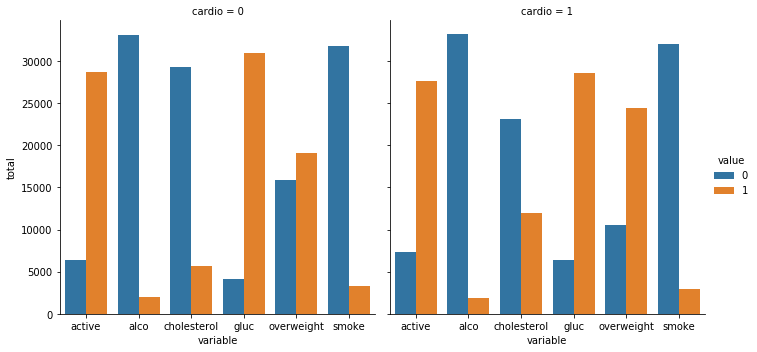

In [136]:
#Creating DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars =["cardio"], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'])

# Grouping and reformating the data to split it by 'cardio'. Show the counts of each feature. After rename one of the collumns for the catplot to work correctly.
df_cat["total"] = 1
df_cat = df_cat.groupby(["cardio","variable", "value"], as_index =False).count()

# Drawing the catplot with 'sns.catplot()'
fig = sns.catplot(x = "variable", y = "total", data = df_cat, hue ="value", kind = "bar", col = "cardio").fig
    
fig.savefig('catplot.png')


In [135]:
# Taking a look in df_cat dataframe
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,4127
7,0,gluc,1,30894
8,0,overweight,0,15915
9,0,overweight,1,19106


### Drawing the Heat Map

In [138]:
#Cleaning the data
df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))]

In [111]:
df_heat

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,1,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,1,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,1,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,0,0,0,0,1,1


In [139]:
# Creating the correlation matrix
corr = df_heat.corr(method = "pearson")
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,-0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,-0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,-0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,-0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,-0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,-0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,-0.002289,-0.086990,0.021357,0.030469,-0.107072,-0.011111,-0.074840,-0.383743,1.000000,0.004157,-0.014297,0.010145,-0.088445,-0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [123]:
# Generating a mask for the upper triangle
mask = np.triu(corr)
mask

array([[ 1.00000000e+00,  2.50729691e-03,  3.42610273e-03,
         3.25916709e-04,  1.49333224e-04,  3.49238023e-03,
         4.83670793e-04,  3.71939143e-03, -2.28909034e-03,
        -2.73227725e-03, -7.08059804e-04,  5.89114223e-03,
         3.90011059e-03, -6.79420314e-04],
       [ 0.00000000e+00,  1.00000000e+00, -1.81320052e-02,
        -7.69318347e-02,  7.01683896e-02,  1.86894095e-02,
         1.53507973e-01,  1.29996176e-01, -8.69901449e-02,
        -4.43706471e-02, -2.69695382e-02, -1.14451266e-02,
         2.40241089e-01,  8.95726547e-02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         5.05784851e-01,  1.29979320e-01,  5.06250408e-03,
         5.99466484e-02, -3.76050443e-02,  2.13573847e-02,
         3.37435881e-01,  1.68637124e-01,  7.86370242e-03,
         2.31999158e-03, -5.29296848e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  2.51502865e-01,  4.58573625e-03,
         1.79224331e-02, -6.35217890e-02,  3.

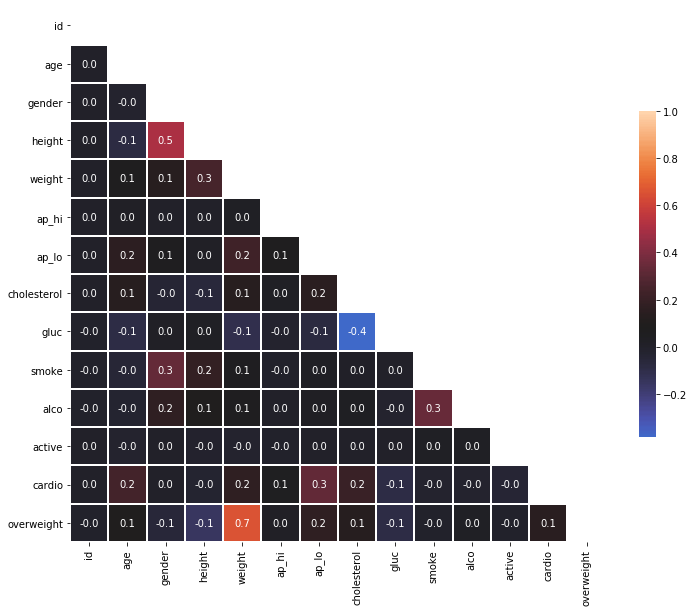

In [146]:
# Seting up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 12)) 
sns.heatmap(corr, linewidths=1, annot = True, square = True, mask = mask, fmt =".1f" ,center =0.08,cbar_kws = {"shrink":0.5})